In [193]:
# Import necessary libraries

# FOR Data Analysis
import pandas as pd
import numpy as np


#FOR Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [194]:
# Load Data
data = pd.read_csv ('../data/diabetes_prediction_dataset.csv')
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [195]:
# Data pre-processing
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [196]:
# extracting label/target from the dataset

features = data.drop("diabetes", axis = 1)
label = data["diabetes"]

In [197]:
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80


In [198]:
label.head(2)

0    0
1    0
Name: diabetes, dtype: int64

In [199]:
# Dealing with outliers - 'blood_glucose_level', 'HbA1c_level', 'bmi', 

# Normalizing the data

from sklearn.preprocessing import RobustScaler 
Scaler = RobustScaler ()

data['Scaled_BG'] = Scaler.fit_transform(data[['blood_glucose_level']])
data['Scaled_A1c'] = Scaler.fit_transform(data[['HbA1c_level']])
data['Scaled_BMI'] = Scaler.fit_transform(data[['bmi']])

data.drop(['blood_glucose_level', 'HbA1c_level', 'bmi'], axis = 1, inplace =True)

data.head()

,gender,age,hypertension,heart_disease,smoking_history,diabetes,Scaled_BG,Scaled_A1c,Scaled_BMI
0,Female,80.0,0,1,never,0,0.000000,0.571429,-0.357983
1,Female,54.0,0,0,No Info,0,-1.016949,0.571429,0.000000
2,Male,28.0,0,0,never,0,0.305085,-0.071429,0.000000
3,Female,36.0,0,0,current,0,0.254237,-0.571429,-0.650420
4,Male,76.0,1,1,current,0,0.254237,-0.714286,-1.206723


In [200]:
# Encoding categorial variables - converting categorical data to numerical
categorical_columns = features.select_dtypes(include = "object")

In [201]:
categorical_columns.head(3)

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never


In [202]:
! pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

In [203]:
# 1. create object of the encoder
encoder = LabelEncoder()

In [204]:
# 2. fit (learning)
encoder.fit (data["gender"])

LabelEncoder()

In [205]:
encoder.transform(data["gender"])

array([0, 0, 1, ..., 1, 0, 0], shape=(100000,))

In [206]:
encoder.fit (data["smoking_history"])

LabelEncoder()

In [207]:
encoder.transform(data['smoking_history'])

array([4, 0, 4, ..., 3, 4, 1], shape=(100000,))

In [208]:
data['gender'].head(3)

0    Female
1    Female
2      Male
Name: gender, dtype: object

In [209]:
data['smoking_history'].head(3)

0      never
1    No Info
2      never
Name: smoking_history, dtype: object

In [210]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [211]:
data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [212]:
# Reverse the process using sklearn LabelEncoder

data['gender'] = encoder.fit_transform(data['gender'])
data['smoking_history'] = encoder.fit_transform(data['smoking_history'])

In [213]:
for column_name in categorical_columns:
    features[column_name] = encoder.fit_transform(features[column_name])

In [214]:
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


In [215]:
# Data Splitting
from sklearn.model_selection import train_test_split

In [216]:
# feature_train, feature_test, label_train, label_test = train_test_split( feature, label, test_size=0.2, random_state=42) 

In [217]:
# features = x, label = y
x_train, x_test, y_train, y_test = train_test_split( features, label, test_size=0.2, random_state=42)

In [218]:
x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,80
48955,1,80.0,0,0,4,24.60,5.7,145
44966,0,38.0,0,0,2,24.33,4.0,158
13568,0,26.0,0,0,5,18.87,5.0,100
92727,0,61.0,1,0,1,22.11,4.5,85


In [219]:
# Model Training
from sklearn.linear_model import LogisticRegression

In [220]:
model = LogisticRegression(random_state =42)

In [221]:
model.fit (x_train, y_train)

LogisticRegression(random_state=42)

In [222]:
predictions = model.predict(x_test)

In [223]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [224]:
y_test.values[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [225]:
# Model Evaluation
from sklearn.metrics import classification_report , confusion_matrix

In [226]:
report = classification_report(y_test, predictions, digits= 5)
matrix = confusion_matrix(y_test, predictions)

In [227]:
print(report)

              precision    recall  f1-score   support

           0    0.96038   0.98595   0.97300     18292
           1    0.78952   0.56440   0.65825      1708

    accuracy                        0.94995     20000
   macro avg    0.87495   0.77518   0.81562     20000
weighted avg    0.94579   0.94995   0.94612     20000



In [228]:
# calculating Diabetes count percentage
label.value_counts(normalize=True)*100

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

<Axes: xlabel='diabetes', ylabel='count'>

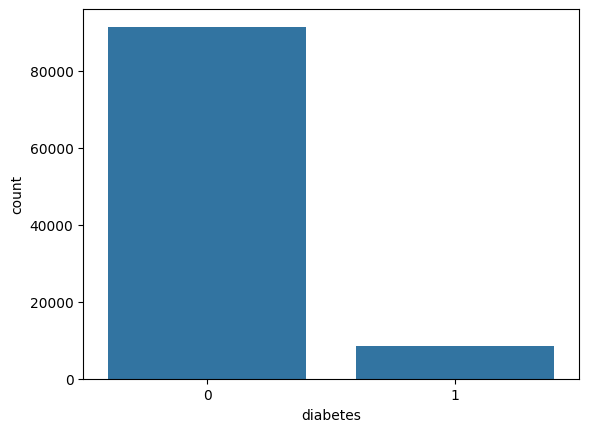

In [229]:
sns.countplot(x=data['diabetes'])

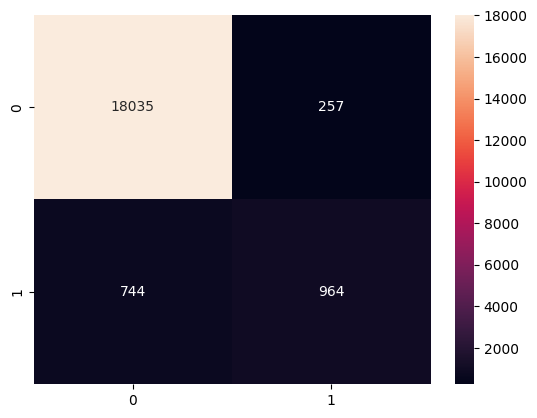

In [230]:
sns.heatmap(matrix, annot=True, fmt='g')
plt.savefig('eva_conf_matrix_1.png')
plt.show()

In [231]:
# Scale the values in the train and test features. And retrain the model with the scaled data.
# improving model performance

In [232]:
# For heavily skewed distribution ==> RobustScaler
from sklearn.preprocessing import RobustScaler

In [233]:
Scaler = RobustScaler()

In [234]:
x_train_Scaled = Scaler.fit_transform(x_train)
x_test_Scaled = Scaler.fit_transform(x_test)

              precision    recall  f1-score   support

           0    0.96537   0.99065   0.97785     18292
           1    0.86086   0.61944   0.72046      1708

    accuracy                        0.95895     20000
   macro avg    0.91312   0.80504   0.84916     20000
weighted avg    0.95645   0.95895   0.95587     20000



<Axes: >

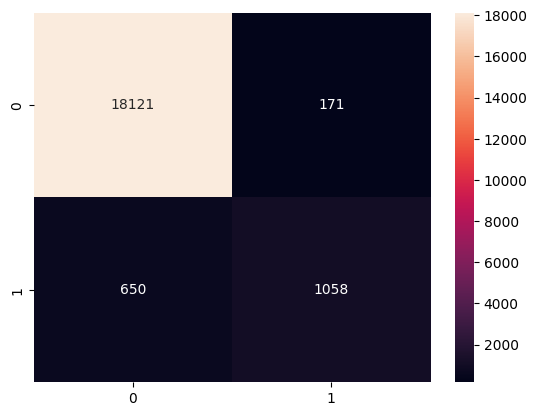

In [235]:
model = LogisticRegression(random_state=42)
model.fit(x_train_Scaled, y_train)
predictions = model.predict(x_test_Scaled)
report = classification_report(y_test, predictions, digits= 5)
matrix = confusion_matrix(y_test,predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')

In [236]:
# improving the model - trying better

              precision    recall  f1-score   support

           0    0.97792   0.95391   0.96577     18292
           1    0.60918   0.76932   0.67995      1708

    accuracy                        0.93815     20000
   macro avg    0.79355   0.86162   0.82286     20000
weighted avg    0.94643   0.93815   0.94136     20000



<Axes: >

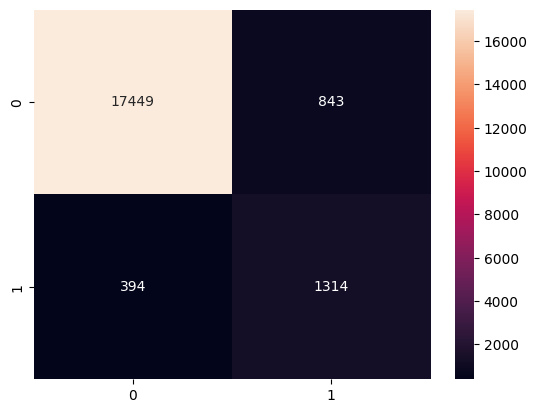

In [237]:
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})
model.fit(x_train_Scaled, y_train)
predictions= model.predict(x_test_Scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test,predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')

In [238]:
# Trying other ML Algorithms

In [239]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

Logistic Regression
              precision    recall  f1-score   support

           0    0.97792   0.95391   0.96577     18292
           1    0.60918   0.76932   0.67995      1708

    accuracy                        0.93815     20000
   macro avg    0.79355   0.86162   0.82286     20000
weighted avg    0.94643   0.93815   0.94136     20000



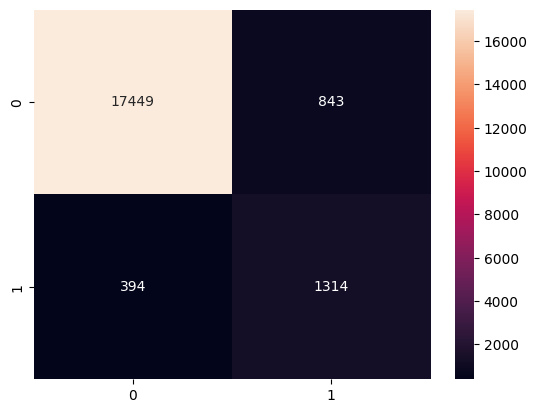

Decision Tree
              precision    recall  f1-score   support

           0    0.97590   0.97168   0.97378     18292
           1    0.71013   0.74297   0.72618      1708

    accuracy                        0.95215     20000
   macro avg    0.84301   0.85733   0.84998     20000
weighted avg    0.95320   0.95215   0.95264     20000



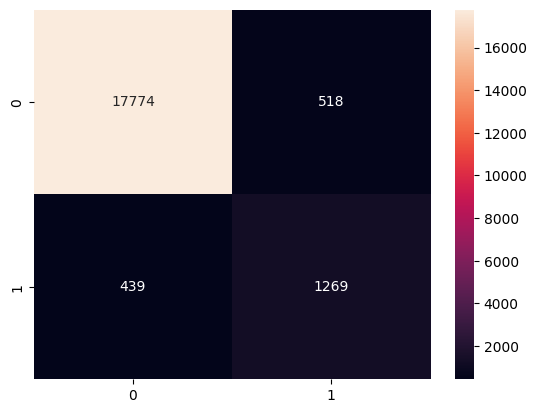

SGD Classifiers
              precision    recall  f1-score   support

           0    0.97519   0.96900   0.97209     18292
           1    0.68914   0.73595   0.71178      1708

    accuracy                        0.94910     20000
   macro avg    0.83217   0.85248   0.84193     20000
weighted avg    0.95076   0.94910   0.94985     20000



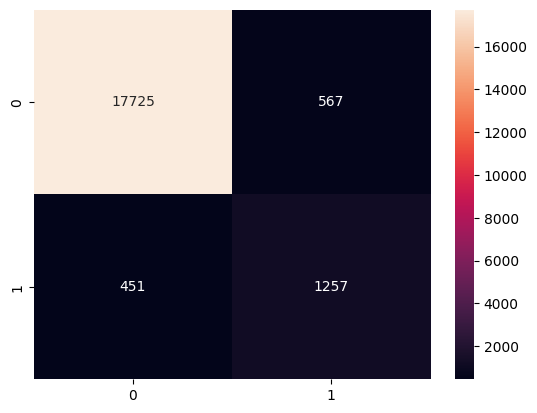

Random Forest
              precision    recall  f1-score   support

           0    0.97180   0.99677   0.98413     18292
           1    0.95234   0.69028   0.80041      1708

    accuracy                        0.97060     20000
   macro avg    0.96207   0.84353   0.89227     20000
weighted avg    0.97014   0.97060   0.96844     20000



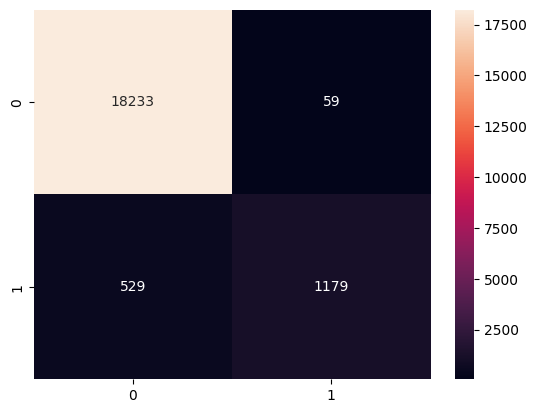

In [240]:
# Initialize and train the models


class_weights = {0:1, 1:4}

classifiers = [ [LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights),'Decision Tree'],
               [SGDClassifier(random_state=42, class_weight=class_weights),'SGD Classifiers'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights),'Random Forest'] ]

for classifier in classifiers:
    model_name = classifier [1]
    model = classifier [0]
    print(model_name)
    model.fit(x_train_Scaled, y_train)
    predictions = model.predict(x_test_Scaled)
    report = classification_report(y_test, predictions, digits=5)
    matrix = confusion_matrix(y_test, predictions)
    print(report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
                                   

In [241]:
# Explainable AI (XAI)
# Feature selection p
# Feature Importance

In [242]:
classifiers[3]

[RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42),
 'Random Forest']

In [243]:
classifiers[3][0].feature_importances_

array([0.00699767, 0.14818904, 0.02277176, 0.0156351 , 0.03030393,
       0.12604017, 0.35318504, 0.2968773 ])

In [244]:
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


In [245]:
importances = classifiers[3][0].feature_importances_
feat_col = features.columns

In [246]:
features_importance_df = pd.DataFrame({'features':feat_col, 'importances':importances})

In [247]:
features_importance_df

,features,importances
0,gender,0.006998
1,age,0.148189
2,hypertension,0.022772
3,heart_disease,0.015635
4,smoking_history,0.030304
5,bmi,0.126040
6,HbA1c_level,0.353185
7,blood_glucose_level,0.296877


In [248]:
features_importance_df = features_importance_df.sort_values (by='importances', ascending=False)

In [249]:
features_importance_df

,features,importances
6,HbA1c_level,0.353185
7,blood_glucose_level,0.296877
1,age,0.148189
5,bmi,0.126040
4,smoking_history,0.030304
2,hypertension,0.022772
3,heart_disease,0.015635
0,gender,0.006998


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.4, 0, '0.40')])

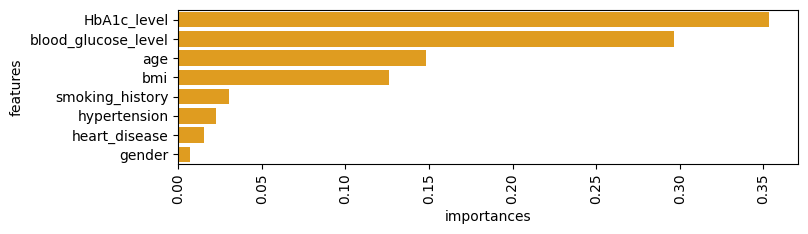

In [250]:
plt.figure(figsize = (8,2))
sns.barplot(y='features', x='importances', data= features_importance_df, color='orange')
plt.xticks (rotation=90)

In [251]:
# Train the model with top-5 or top-n 'dimentionality reduction'

In [252]:
# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

In [253]:
# random forest classifier default values - click on () then shift+tab to choose from the default values to use in tuning the model 
RandomForestClassifier()

RandomForestClassifier()

In [254]:
# class_weight : for mapping
# create a dictionary of some default values to tune the model
parameter_grid = {
    'max_depth':[20,30,40],
    'min_samples_split':[2,5,7],
    'n_estimators':[100,200,150],
    'class_weight':[{0:1,1:2},{0:1,1:2},{0:1,1:5}]
}